In [64]:
#pip install tensorflow

In [65]:
#Data
import numpy as np
import pandas as pd

#Charts and visulaization
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go

#NNs
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [66]:
import glob
import pandas as pd

# Set the path to the folder containing the CSV files
#data = r"C:\Users\guilherme.salvador\OneDrive - 501101365 - Rangel Invest SA\XLS_rangel_files\Job_table_info.xls"
data = r"C:\Users\Salvador\OneDrive - FCT NOVA\01- Documents\Dissertação\(R) ML_Model\Job_table_info_V2\Job_Info1.xls"
data = pd.read_excel(data)

In [67]:
data.head

<bound method NDFrame.head of                jobno                                           custname  \
0      HAISID2300014    GRUPO DESPORTIVO RECREATIVO E CULTURAL PRETORIA   
1       JNBIL2301115                 SPEEDLINK PROJECTS & TRADE PVT LTD   
2      HSEPDL2300228  SEGMA SERVICOS DE ENGENHARIA, GESTAO E MANUTEN...   
3      HSEPDL2300226  ISLAND IMPORT - IMPORTACAO DE PRODUTOS ALIMENT...   
4      HSEPDL2300227  SEGMA SERVICOS DE ENGENHARIA, GESTAO E MANUTEN...   
...              ...                                                ...   
49995  HSELIS2218499              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49996  HSELIS2218172              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49997   AELIS2214432              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49998   AELIS2214179              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   
49999   AELIS2214254              CEP II-CORREOS EXPRESS PORTUGAL, S.A.   

          jobdate biztype  departure_loc              destino      fr

#### [Não funciona ao primeiro RUN]

In [68]:
# Assuring jobdate is in datetime format
data['jobdate'] = pd.to_datetime(data['jobdate'])


C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2203' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/03/2025' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/07/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Salvador\Documents\Coding\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: User

In [69]:
data['jobdate'] = pd.to_datetime(data['jobdate'])


In [70]:
# Convert the date column to the appropriate date format
data['jobdate'] = pd.to_datetime(data['jobdate'])

# Extract the month from the date column
data['Year'] = data['jobdate'].dt.year
data['Month'] = data['jobdate'].dt.month

# Ensure that the freight cost column is in numeric format
data['frete'] = pd.to_numeric(data['frete'])

In [71]:
print(data.columns)

Index(['jobno', 'custname', 'jobdate', 'biztype', 'departure_loc', 'destino',
       'frete', 'incoterm', 'total_volume_cbm', 'ownerid', 'servicetype',
       'bizscope', 'ctnqty1', 'ctnqty2', 'ctnqty3', 'ctnqty4', 'polname',
       'podname', 'Year', 'Month'],
      dtype='object')


## DataFrame creation
#### 3D Array with the dimension of the number of enterprises

In [72]:
# Create a DataFrame with all possible combinations of Year and Month
all_months = pd.DataFrame(index=pd.MultiIndex.from_product([range(2021, 2024), range(1, 13)], names=['Year', 'Month']))

# Group your data by Year and Month
grouped_data = data.groupby(['Year', 'Month'])

# Perform the desired aggregations on your grouped data
aggregated_data = grouped_data.agg({'frete': 'sum', 'jobno': 'size'})

# Reindex the aggregated data to include all months and convert the Month column to the desired representation
aggregated_data = aggregated_data.reindex(all_months.index, fill_value=0)
aggregated_data.reset_index(inplace=True)
aggregated_data['Month'] = ((aggregated_data['Year'] - aggregated_data['Year'].min()) * 12) + aggregated_data['Month']
aggregated_data = aggregated_data[aggregated_data['Year'] <= 2023]

# Sort the data by the new representation of Month
aggregated_data.sort_values('Month', inplace=True)

# Reset the index to have a sequential order
aggregated_data.reset_index(drop=True, inplace=True)

# Rename the columns
aggregated_data.rename(columns={'frete': 'Total_Frete', 'jobno': 'Total_Jobs'}, inplace=True)

aggregated_data

,Year,Month,Total_Frete,Total_Jobs
0,2021,1,0.00,0
1,2021,2,0.00,0
2,2021,3,0.00,0
3,2021,4,0.00,0
4,2021,5,0.00,0
5,2021,6,0.00,0
6,2021,7,0.00,0
7,2021,8,0.00,0
8,2021,9,0.00,0
9,2021,10,0.00,0


In [73]:
import numpy as np
import pandas as pd

# Assuming `data` is your original DataFrame

# Get unique values of 'custname'
unique_custnames = data['custname'].unique()
num_custnames = len(unique_custnames)

# Create the 3D array
num_months = 36
depth = 4
array_3d = np.zeros((num_custnames, num_months, depth))

# Iterate over unique custnames
for i, custname in enumerate(unique_custnames):
    # Filter data for the current custname
    custname_data = data[data['custname'] == custname]
    
    # Iterate over the months
    for j in range(num_months):
        year = 2021 + (j // 12)  # Calculate the year based on month index
        month = (j % 12) + 1  # Calculate the month based on month index
        
        # Filter data for the current year and month
        month_data = custname_data[(custname_data['Year'] == year) & (custname_data['Month'] == month)]
        
        # Fill the 3D array with the corresponding data
        if not month_data.empty:
            array_3d[i, j, 0] = year
            array_3d[i, j, 1] = month
            array_3d[i, j, 2] = month_data['frete'].sum()
            array_3d[i, j, 3] = month_data['jobno'].size

# Print the 3D array
np.set_printoptions(precision=2, suppress=True)
array_3d.shape


(2632, 36, 4)

In [74]:
import numpy as np
import pandas as pd

# Assuming `data` is your original DataFrame

# Get unique values of 'custname'
unique_custnames = data['custname'].unique()
num_custnames = len(unique_custnames)

# Create the 3D array
num_months = 60
depth = 4
array_3d = np.zeros((num_custnames, num_months, depth))

# Create a dictionary to map custname index to dimension
custname_to_dimension = {}

# Iterate over unique custnames
for i, custname in enumerate(unique_custnames):
    custname_to_dimension[custname] = i

# Print the custname-to-dimension mapping
for custname, dimension in custname_to_dimension.items():
    print(f"{custname}: Dimension {dimension}")

# Output:
# custname1: Dimension 0
# custname2: Dimension 1

GRUPO DESPORTIVO RECREATIVO E CULTURAL PRETORIA: Dimension 0
SPEEDLINK PROJECTS & TRADE PVT LTD: Dimension 1
SEGMA SERVICOS DE ENGENHARIA, GESTAO E MANUTENCAO, LDA.: Dimension 2
ISLAND IMPORT - IMPORTACAO DE PRODUTOS ALIMENTARES: Dimension 3
ETCP- EUROPEAN TECNOLOGIES COMMUNICATIONS PORTUGAL: Dimension 4
SANITOP- MATERIAL SANITÁRIO LDA: Dimension 5
RANGEL TRANSITARIOS,S.A.: Dimension 6
TRACTORLUSO - COMERCIO DE MAQUINAS E REPRESENTACOES, LDA: Dimension 7
ANTONIO MANESSIM: Dimension 8
CLIENTE PARTICULAR REBOLEIRA: Dimension 9
RANGEL LOGISTICA CABO VERDE LDA (MINDELO): Dimension 10
RANGEL LOGISTICA CABO VERDE LDA (PRAIA): Dimension 11
BENVINDO OLIVEIRA FORTES: Dimension 12
ANTONIO PEDRO RODRIGUES NEVES: Dimension 13
A COLMEIA DO MINHO, S.A.: Dimension 14
MEDIMPORT: Dimension 15
GISPOL IND. PLASTICOS: Dimension 16
PLASZONE - EQUIPAMENTOS PARA A INDUSTRIA, LDA: Dimension 17
SHIPPLER (PTY) LTD: Dimension 18
KMS - COMRCIO DE PRODUTOS ALIMENTAR - PERFUMARIA: Dimension 19
SPEEDBIRD LOGISTICS (

T.S. PINTO - ATELIER DAS CORTINAS LDA: Dimension 2478
JOSE MARIA LOPES DE PINA: Dimension 2479
KRISTAL: Dimension 2480
ANTONIO CARLOS GONCALVES BRANDAO: Dimension 2481
INVITROCELL LDA: Dimension 2482
SANITOP - MATERIAL SANITRIO, LDA: Dimension 2483
JAC PRODUCTS POLAND SP.ZO.O: Dimension 2484
TECNODECK - IMP.E TRANSF.DE MAT.COMPOSITOS, LDA: Dimension 2485
CONSORCIO PORTUGUES INTERCONTINENTAL, S.A.: Dimension 2486
NOVIREL - NOVIDADEE REPRESENTACOES, LDA: Dimension 2487
TUBOSANITAIOS DE FERNANDO M. ESTEVES, UNIPESSOAL,: Dimension 2488
RIJOMOTOR  FABRICACAO E IMPORTACAO DE VEICULOS LDA.: Dimension 2489
SOCIOPTICA: Dimension 2490
PLANETA TILES LDA: Dimension 2491
BEE LOGISTICS  CORPORATION: Dimension 2492
OSCAR TIAGO GONCALVES TRINDADE PEREIRA: Dimension 2493
RIALTO INDUSTRIA ALIMENTAR LDA.: Dimension 2494
MOLDEBLOCOS II: Dimension 2495
MARIA HELENA GOMES DA SILVA: Dimension 2496
EMBALAGENS METALICAS RIO CAIMA S.A.: Dimension 2497
KMS-COMERCIO DE PRODUTOS ALIMENTAR,: Dimension 2498
JOSE ROM

## -------------------------------------------------------

## Outlier detection


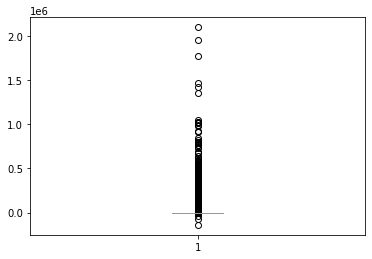

In [75]:
plt.boxplot(data['frete'])
plt.show()

In [76]:
from scipy.stats import zscore

# Calculate z-scores for a column
z_scores = zscore(data['frete'])

# Identify outliers based on a threshold
outlier_threshold = 3
outliers = data[abs(z_scores) > outlier_threshold]

print(outliers)
#create a list with outliers


               jobno                                   custname    jobdate  \
1       JNBIL2301115         SPEEDLINK PROJECTS & TRADE PVT LTD 2033-05-06   
34      MPMSI2300253                                  MEDIMPORT 2023-05-07   
58     HSIVXE2300323                        ELOY NEVES & FILHOS 2023-06-24   
59      RAISI2300097            SICOR EMP.COMERCIAIS E SERVICOS 2023-06-24   
60      VXESI2300074         SITA- SOC.INDUSTRIAL DE TINTAS,LDA 2023-06-24   
...              ...                                        ...        ...   
49590  HSIVXE2200869            SICOR EMP.COMERCIAIS E SERVICOS 2022-12-18   
49595  HSIVXE2200871  RANGEL LOGISTICA CABO VERDE LDA (MINDELO) 2022-12-18   
49602  HSIVXE2200870                        ELOY NEVES & FILHOS 2022-12-18   
49610  HSIVXE2200893                ZEFERINO ROCHA CID UNIP.LDA 2022-12-18   
49670   VXESI2200136                             WATER SOLUTION 2022-12-17   

      biztype departure_loc      destino      frete incoterm  \

## ----------------------------------------------------------

## Tragets and Inputs Variables


In [77]:
#columns = year, month, frete, jobno

#forecasting for the next 3 months
forecast_dist = 3

# Input features (X)
#input_indices=[0,1,3]
inputs = array_3d[:,:-forecast_dist,: ] #last 'forecast_dist' months not included

# Target variable (y)
targets = array_3d[:,forecast_dist:,2]
targets= np.expand_dims(targets, axis= -1) #first 'forecast_dist' months not included

inputs.shape, targets.shape

((2632, 57, 4), (2632, 57, 1))

## Train-Test Split (scikit-learn library)

In [78]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=42) #42 assures the same split everytime

inputs_train.shape, targets_train.shape

((2105, 57, 4), (2105, 57, 1))

## Definir e treinar o modelo RNN (nao conluído)

In [79]:
#Definir variáveis a mudar
timesteps = None
features = 4
units_RNN = 32

num_epochs = 10
batch_size = 32

In [80]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units=units_RNN, input_shape=(timesteps, features), return_sequences=True)) #n sabemos quantos meses vai receber
#returnsequences faz reparar na sequencia

model.add(LSTM(units=units_RNN, return_sequences=True))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, None, 32)          4736      
                                                                 
 lstm_9 (LSTM)               (None, None, 32)          8320      
                                                                 
 dense_3 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 13,089
Trainable params: 13,089
Non-trainable params: 0
_________________________________________________________________


In [81]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [82]:
model.fit(inputs_train, targets_train, batch_size=batch_size, epochs=10)
#callback

Epoch 1/10
66/66 [==============================] - 5s 24ms/step - loss: 0.0000e+00
Epoch 2/10
66/66 [==============================] - 2s 24ms/step - loss: 0.0000e+00
Epoch 3/10
66/66 [==============================] - 2s 25ms/step - loss: 0.0000e+00
Epoch 4/10
66/66 [==============================] - 2s 24ms/step - loss: 0.0000e+00
Epoch 5/10
66/66 [==============================] - 2s 24ms/step - loss: 0.0000e+00
Epoch 6/10
66/66 [==============================] - 2s 25ms/step - loss: 0.0000e+00
Epoch 7/10
66/66 [==============================] - 2s 24ms/step - loss: 0.0000e+00
Epoch 8/10
66/66 [==============================] - 2s 23ms/step - loss: 0.0000e+00
Epoch 9/10
66/66 [==============================] - 2s 23ms/step - loss: 0.0000e+00
Epoch 10/10
66/66 [==============================] - 2s 24ms/step - loss: 0.0000e+00


# Callback

In [84]:
preds = model(inputs_train)

In [85]:
preds.shape

TensorShape([2105, 57, 1])

In [86]:
k = 3

In [87]:
aux_preds = preds[:,-k:] # avaliar apenas os últimos 3 meses
aux_targets = targets_train[:,-k:]

In [88]:
aux_targets.shape

(2105, 3, 1)

In [89]:
import tensorflow as tf
mse = tf.keras.losses.MeanSquaredError()

In [90]:
mse(aux_targets, aux_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

## ----------------------------------------------